## Importando Bibliotecas

In [4]:
import tensorflow as tf 
from tensorflow import keras
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Input, Dense
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.models import Model
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## Pre-processamento dos dados
**Carregando os dados de treino e teste:**

In [5]:
train_images = pd.read_csv('../fashion-mnist_train.csv')
test_images = pd.read_csv('../fashion-mnist_test.csv')

**Separando as labels do conjuntos:**

In [6]:
train_labels=train_images.loc[:, ['label']]
train_images=train_images.drop(['label'], axis=1)
test_labels=test_images.loc[:, ['label']]
test_images=test_images.drop(['label'], axis=1)

**Normalizando os data-sets:**

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0


----------------------
## Construção do modelo base
**Esta rede será utilizada posteriomente para comparações entre os modelos de dimensionalidade reduzida utilizando PCA e autoencoder.**

**Definição da estrutura do modelo por meio do Keras Sequential:**

In [8]:
model = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(784)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [10]:
model.fit(train_images, train_labels, epochs=5, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 6s 115us/sample - loss: 0.5242 - accuracy: 0.8120 - val_loss: 0.4055 - val_accuracy: 0.8550
Epoch 2/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3852 - accuracy: 0.8590 - val_loss: 0.3714 - val_accuracy: 0.8681
Epoch 3/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3495 - accuracy: 0.8715 - val_loss: 0.3658 - val_accuracy: 0.8686
Epoch 4/5
48000/48000 [==============================] - 5s 110us/sample - loss: 0.3259 - accuracy: 0.8798 - val_loss: 0.3730 - val_accuracy: 0.8656
Epoch 5/5
48000/48000 [==============================] - 5s 111us/sample - loss: 0.3079 - accuracy: 0.8864 - val_loss: 0.3680 - val_accuracy: 0.8708


**Verificação dos resultados do modelo:**

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3503 - accuracy: 0.8727
Model - 3 layers - test loss: 35.0270946097374
Model - 3 layers - test accuracy: 87.26999759674072


-----------------------------
## Redução de Dimensionalidade Usando Principal component analysis (PCA)

**Definição do número de componentes:**

In [12]:
pca = PCA(n_components=3)

**Construção dos novos datasets de treino e de teste com dimensões reduzidas usando o PCA:**

In [43]:
print(train_images)
train_images_r = pca.fit(train_images).transform(train_images)
test_images_r = pca.fit(test_images).transform(test_images)

       pixel1  pixel2  pixel3    pixel4    pixel5  pixel6  pixel7    pixel8  \
0         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
1         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
2         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.019608   
3         0.0     0.0     0.0  0.003922  0.007843     0.0     0.0  0.000000   
4         0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
...       ...     ...     ...       ...       ...     ...     ...       ...   
59995     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59996     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59997     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59998     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   
59999     0.0     0.0     0.0  0.000000  0.000000     0.0     0.0  0.000000   

       pixel9  pixel10  ...  pixel775  pixel776  pi

**Alteração do tipo dos dados de numpy array para pandas dataframe:**

In [42]:
train_images_r = pd.DataFrame(data=train_images_r)
test_images_r= pd.DataFrame(data=test_images_r)
print(train_images_r)

              0         1         2
0      3.686333  4.960529 -0.051232
1     -4.376434  3.861059 -1.949433
2      7.265152  1.568757  2.315238
3      3.227788 -2.325256 -0.649302
4      4.146373 -4.039080 -1.515247
...         ...       ...       ...
59995  0.017613  5.188697 -5.057010
59996 -3.115212 -5.211554 -0.104906
59997  2.181650  0.451775 -0.556464
59998  1.470069  6.063398 -0.624757
59999 -3.571693  4.771146 -0.266293

[60000 rows x 3 columns]


**Definição da estrutura do modelo por meio do Keras Sequential que receberá os dados com dimensões reduzidas pelo PCA:**

In [15]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(3)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 9,866
Trainable params: 9,866
Non-trainable params: 0
_________________________________________________________________


**Compilação do modelo:**

In [16]:
model_r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Treino do modelo:**

In [17]:
model_r.fit(train_images_r, train_labels, epochs=5, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 64us/sample - loss: 0.9808 - accuracy: 0.5942 - val_loss: 0.9134 - val_accuracy: 0.6148
Epoch 2/5
48000/48000 [==============================] - 3s 58us/sample - loss: 0.8971 - accuracy: 0.6259 - val_loss: 0.8862 - val_accuracy: 0.6363
Epoch 3/5
48000/48000 [==============================] - 3s 61us/sample - loss: 0.8777 - accuracy: 0.6359 - val_loss: 0.8938 - val_accuracy: 0.6146
Epoch 4/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.8686 - accuracy: 0.6399 - val_loss: 0.8662 - val_accuracy: 0.6426
Epoch 5/5
48000/48000 [==============================] - 3s 59us/sample - loss: 0.8621 - accuracy: 0.6428 - val_loss: 0.8705 - val_accuracy: 0.6317


**Verificação dos resultados do modelo:**

In [18]:
test_loss, test_acc = model_r.evaluate(test_images_r, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.8880 - accuracy: 0.6221
Model - 3 layers - test loss: 88.79879961013793
Model - 3 layers - test accuracy: 62.209999561309814


------------------------------------------------------

## Redução de Dimensionalidade Usando Autoencoders

In [19]:
# this is the size of our encoded representations
encoding_dim = 2
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoder = Model(input_img, encoded)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoded_input = Input(shape=(encoding_dim,))
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [20]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [21]:
#REMOVER troque o 'adadelta' pelo 'adam'
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
autoencoder.fit(train_images, train_images,epochs=5,shuffle=True,validation_data=(test_images, test_images))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.4379 - val_loss: 0.4076
Epoch 2/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.4009 - val_loss: 0.3941
Epoch 3/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.3904 - val_loss: 0.3853
Epoch 4/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3830 - val_loss: 0.3793
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.3788 - val_loss: 0.3768


In [23]:
encoded_imgs_train = encoder.predict(train_images)
encoded_imgs_test = encoder.predict(test_images)


In [24]:
train_images_a = pd.DataFrame(data=encoded_imgs_train)
test_images_a =pd.DataFrame(data=encoded_imgs_test)

In [25]:
model_r = keras.Sequential([
    keras.layers.Dense(64,activation=tf.nn.relu,input_dim=(2)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_r.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 9,802
Trainable params: 9,802
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_r.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
model_r.fit(train_images_a, train_labels, epochs=5, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 65us/sample - loss: 1.2896 - accuracy: 0.4697 - val_loss: 1.1981 - val_accuracy: 0.4937
Epoch 2/5
48000/48000 [==============================] - 3s 62us/sample - loss: 1.1674 - accuracy: 0.5240 - val_loss: 1.1428 - val_accuracy: 0.5356
Epoch 3/5
48000/48000 [==============================] - 3s 69us/sample - loss: 1.1480 - accuracy: 0.5327 - val_loss: 1.1494 - val_accuracy: 0.5334
Epoch 4/5
48000/48000 [==============================] - 3s 61us/sample - loss: 1.1393 - accuracy: 0.5378 - val_loss: 1.1460 - val_accuracy: 0.5337
Epoch 5/5
48000/48000 [==============================] - 3s 68us/sample - loss: 1.1334 - accuracy: 0.5388 - val_loss: 1.1256 - val_accuracy: 0.5471ss: 1


In [28]:
test_loss, test_acc = model_r.evaluate(test_images_a, test_labels)
print("Model - 3 layers - test loss:", test_loss * 100)
print("Model - 3 layers - test accuracy:", test_acc * 100)

10000/10000 [==============================] - 0s 34us/sample - loss: 1.1272 - accuracy: 0.5456
Model - 3 layers - test loss: 112.7247098350525
Model - 3 layers - test accuracy: 54.55999970436096


------------------------------------------------------

## Clustering com K-means

Optamos pela utilização das imagens reduzidas por meio do PCA, já que obtiveram por meio deste modelo os melhores resultados de predição na rede neural.

In [158]:
train_images_k = train_images_r
test_images_k = test_images_r

In [159]:
kmean_model = KMeans(n_clusters=10, random_state=10)
y_km = kmean_model.fit(train_images_k)
labels = kmean_model.labels_

In [177]:
cluster_centroids = kmean_model.cluster_centers_

In [161]:
#silhouette_avg = silhouette_score(X = train_images_k, labels = train_labels.values.ravel(), random_state=10)

In [162]:
silhouette_avg = silhouette_score(X = train_images_k, labels = train_labels.values.ravel(), random_state=10)

In [163]:
#metrics.homogeneity_score(train_labels.values.ravel(), labels)

In [164]:
metrics.v_measure_score(train_labels.values.ravel(), labels, beta=1.0)

0.45694727123110823

### Plotting train_images instances with their classifications represented as different colors

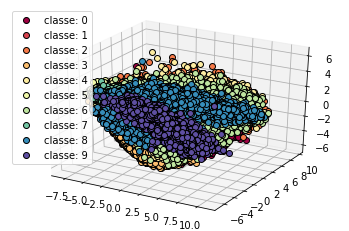

In [165]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting train_images with classification
fig = plt.figure()
ax = fig.gca(projection='3d')

unique_labels = set(train_labels.values.flatten())
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

last_k = -1
for k, col in zip(unique_labels, colors):
    
    class_member_mask = (train_labels == k)
    indices = np.where(class_member_mask == True)
    for index in indices:
        ax.plot(train_images_dbscan[index, 0], train_images_dbscan[index, 1], train_images_dbscan[index, 2],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=f"classe: {k}" if k == last_k else "")
        last_k = k
    
ax.legend()
plt.show()

### Plotando o gráfico das instâncias de treino com cores referentes aos clusters determinados pelo K-means

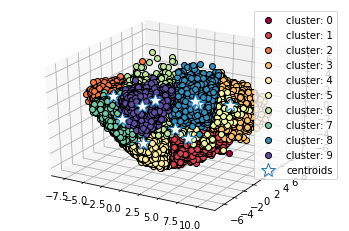

In [176]:
fig = plt.figure()
ax = fig.gca(projection='3d')

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    
    class_member_mask = (labels == k)
    indices = np.where(class_member_mask == True)
    for index in indices:
        ax.plot(train_images_dbscan[index, 0], train_images_dbscan[index, 1], train_images_dbscan[index, 2],'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6, label=f"cluster: {k}")

#Plotting cluster centroids
ax.plot(cluster_centroids[:, 0], cluster_centroids[:, 1], cluster_centroids[:, 2],'*', markerfacecolor=tuple([1, 1, 1, 1]),
            markersize=14, label="centroids")

ax.legend()
plt.show()

---------------------------------
## Clustering com o DBScan


In [59]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

[[ 3.68633325  4.96052901 -0.05123188]
 [-4.37643435  3.86105868 -1.94943298]
 [ 7.26515192  1.56875666  2.31523852]
 ...
 [ 2.18165029  0.45177534 -0.55646427]
 [ 1.47006912  6.06339785 -0.62475691]
 [-3.57169302  4.77114625 -0.2662927 ]]
[ 0  0  0 ... -1  0 -1]
60000
Estimated number of clusters: 22
Estimated number of noise points: 4960
Homogeneity: 0.012
Completeness: 0.088
V-measure: 0.022
Adjusted Rand Index: 0.002
Adjusted Mutual Information: 0.020
Silhouette Coefficient: -0.607


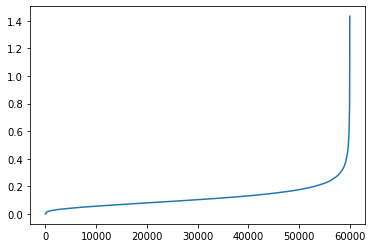

In [85]:
train_images_dbscan = train_images_r
test_images_dbscan = test_images_r

print(train_images_dbscan)


neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(train_images_dbscan)
distances, indices = nbrs.kneighbors(train_images_dbscan)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


db = DBSCAN(eps=0.38, min_samples=10).fit(train_images_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

labels_true = train_labels.values.flatten()

print(labels)
print(len(labels))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(train_images_dbscan, labels))

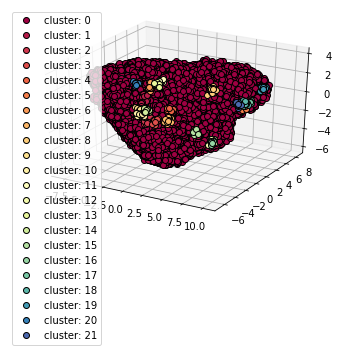

In [151]:
# Plot result
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

last_k = -1
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    else:

        class_member_mask = (labels == k)

        xy = train_images_dbscan[class_member_mask & core_samples_mask]
    #     ax.plot(xy[:3, 0], xy[:3, 1], xy[:3, 2], c=tuple(col))

        ax.plot(xy[:, 0], xy[:, 1], xy[:, 2],'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=f"cluster: {k}" if k == last_k else "")
        
        last_k = k
        
        xy = train_images_dbscan[class_member_mask & ~core_samples_mask]
    #     ax.plot(xy[:3, 0], xy[:3, 1], xy[:3, 2], c=tuple(col))
        ax.plot(xy[:, 0], xy[:, 1], xy[:, 2],'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6, label=f"cluster: {k}" if k == last_k else "")
    
        
ax.legend()
plt.show()